<a href="https://colab.research.google.com/github/rlaaudrb1104/Ai/blob/WOOK/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#1.데이터 불러오기
import pandas as pd #1.Pandas 불러오기

In [2]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
train  #2.train.csv 파일을 테이터프레임으로 읽어오기

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv') #3.test, submission.csv 데이터 프레임으로 읽어오기
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/submission.csv')

In [4]:
submission.head() #4. 데이터프레임의 상위 5개 행 데이터 출력

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
submission.to_csv('submission.csv', index=False)
#데이터프레임을 csv파일로 저장

In [6]:
#2.데이터 확인
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/submission.csv')

In [7]:
len(train)

891

In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [13]:
 #3.모델링 기초
import numpy as np
np.random.seed(0)
survived = np.random.randint(0, 2, size=len(submission['Survived']))
print(survived)

[0 1 1 0 1 1 1 1 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 0
 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 1 1 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1
 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 1
 1 1 0 0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0
 0 1 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0
 0 1 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 1 1 1 0 1 0 0
 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1
 1 1 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 0 1 1
 1 0 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1
 1 1 0 1 1 1 0 0 1 1 0]


In [14]:
submission['Survived'] = survived
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,0
4,896,1
5,897,1
6,898,1
7,899,1
8,900,1
9,901,1


In [15]:
submission.to_csv('submission.csv', index=False)

In [16]:
import pandas as pd
raw_data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
raw_data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
raw_data_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/submission.csv')

In [17]:
train = raw_data_train.copy()
test = raw_data_test.copy()
submission = raw_data_submission.copy()

In [18]:
mean_age = train['Age'].mean()
mean_fare = train['Fare'].mean()
train['Age']=train['Age'].fillna(mean_fare)
train['Fare'] = train['Fare'].fillna(mean_fare)

In [19]:
test['Age'] = test['Age'].fillna(mean_age)
test['Fare'] = test['Fare'].fillna(mean_fare)

In [20]:
test['Age']=test['Age'].fillna(mean_age)
test['Fare']=test['Fare'].fillna(mean_fare)

In [21]:
train_x = train.drop(columns='Survived')
train_y = train['Survived']
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y= train_test_split(train_x, train_y, test_size=0.2, random_state=0)

In [22]:
import statsmodels.api as sm
train_dataset = pd.concat([train_x,train_y], axis=1)
formula = """
Survived ~ Age + SibSp + Parch + Fare
"""
model = sm.Logit.from_formula(formula, data=train_dataset)
result = model.fit()


Optimization terminated successfully.
         Current function value: 0.616324
         Iterations 6


In [23]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      707
Method:                           MLE   Df Model:                            4
Date:                Thu, 28 Mar 2024   Pseudo R-squ.:                 0.07420
Time:                        22:42:41   Log-Likelihood:                -438.82
converged:                       True   LL-Null:                       -473.99
Covariance Type:            nonrobust   LLR p-value:                 1.928e-14
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0432      0.226     -0.191      0.848      -0.486       0.400
Age           -0.0271      0.007     -3.993      0.000      -0.040      -0.014
SibSp         -0.3313      0.094     -3.518      0.000      -0.516      -0.147
Parch          0.1225      0.110      1.118      0.264      -0.092       0.337
Fare           0.0168      0.003      5.799      0.000       0.011       0.022
==============================================================================
"""

In [24]:
y_pred = result.predict(val_x)
y_pred = y_pred.apply(lambda x: 1 if x>=0.5 else 0)

In [25]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_y, y_pred))

[[105   5]
 [ 43  26]]


In [26]:
from sklearn.metrics import classification_report

print(classification_report(val_y, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.95      0.81       110
           1       0.84      0.38      0.52        69

    accuracy                           0.73       179
   macro avg       0.77      0.67      0.67       179
weighted avg       0.76      0.73      0.70       179



In [27]:
y_pred = result.predict(test)

y_pred = y_pred.apply(lambda x: 1 if x >= 0.5 else 0)

submission['Survived'] = y_pred

submission.head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


In [28]:
submission.to_csv('submission.csv', index=False)

In [29]:
#4. EDA & 모델링
import pandas as pd

raw_data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')

raw_data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')

raw_data_submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/submission.csv')

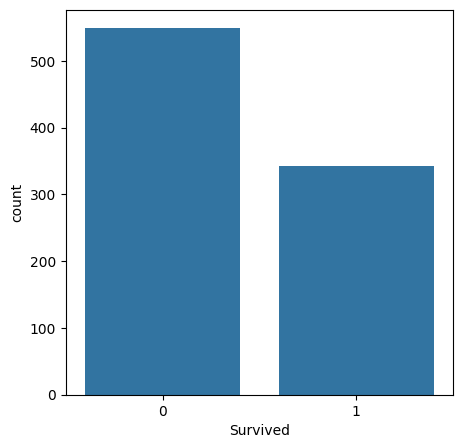

In [30]:
import seaborn as sns

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))

sns.countplot(x=raw_data_train['Survived'])

plt.show()

<ipython-input-31-87ef12feb444>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=raw_data_train[col_name], palette='Set2', ax=ax[0]).set(title=col_name+' count plot')
<ipython-input-31-87ef12feb444>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=raw_data_train, x=col_name, y="Survived", palette='Set2', ax=ax[1]).set(title=col_name+' bar chart')


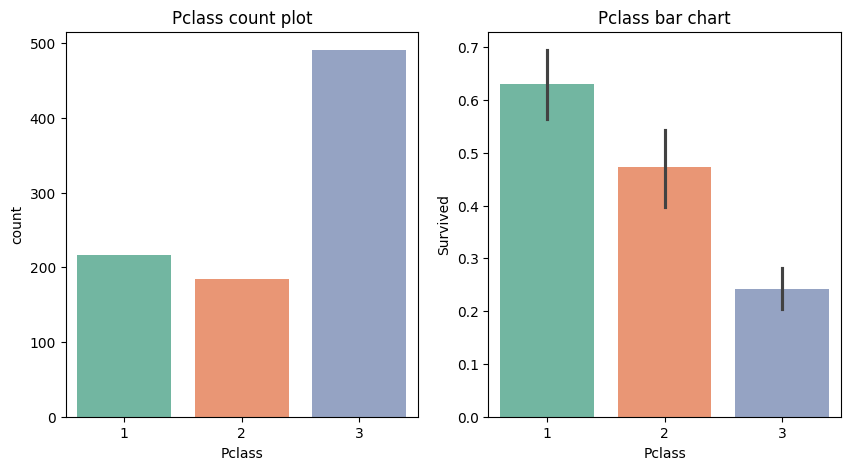

<ipython-input-31-87ef12feb444>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=raw_data_train[col_name], palette='Set2', ax=ax[0]).set(title=col_name+' count plot')
<ipython-input-31-87ef12feb444>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=raw_data_train, x=col_name, y="Survived", palette='Set2', ax=ax[1]).set(title=col_name+' bar chart')


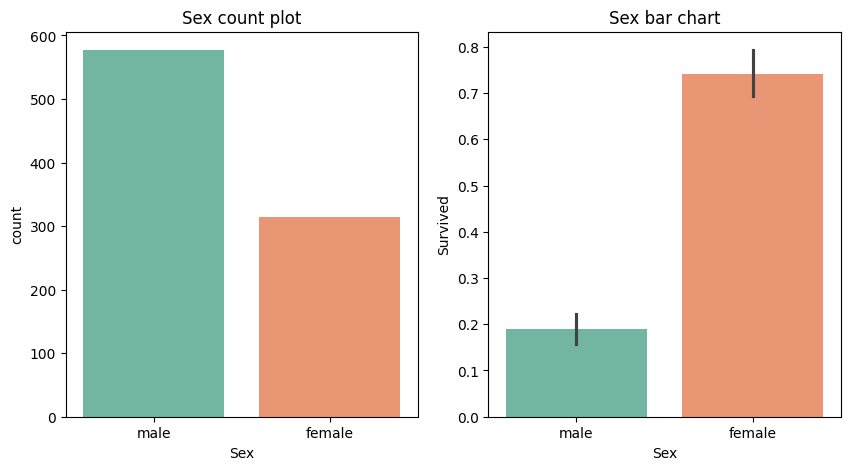

<ipython-input-31-87ef12feb444>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=raw_data_train[col_name], palette='Set2', ax=ax[0]).set(title=col_name+' count plot')
<ipython-input-31-87ef12feb444>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=raw_data_train, x=col_name, y="Survived", palette='Set2', ax=ax[1]).set(title=col_name+' bar chart')


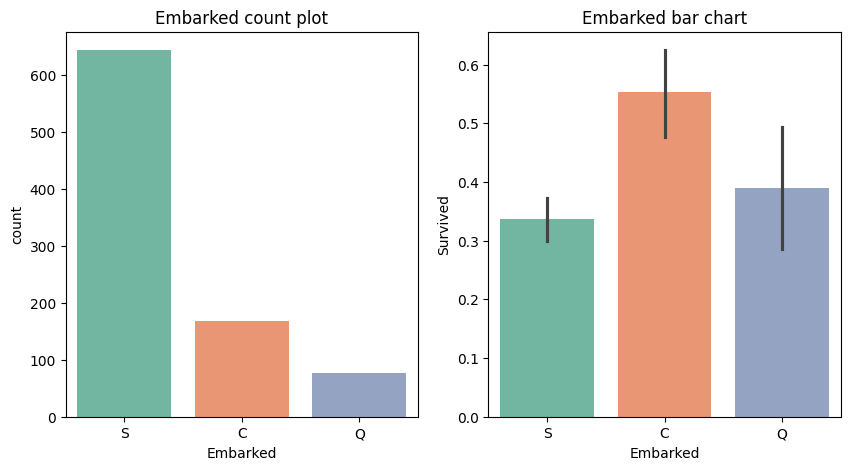

In [31]:
columns = ['Pclass', 'Sex', 'Embarked']

for col_name in columns:

    fig, ax = plt.subplots(ncols=2, figsize=(10,5))

    sns.countplot(x=raw_data_train[col_name], palette='Set2', ax=ax[0]).set(title=col_name+' count plot')

    sns.barplot(data=raw_data_train, x=col_name, y="Survived", palette='Set2', ax=ax[1]).set(title=col_name+' bar chart')

    plt.show()

<ipython-input-32-bcedddecf367>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=raw_data_train[col_name], ax=ax[0], palette='Set2')
<ipython-input-32-bcedddecf367>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=raw_data_train, x=col_name, y="Survived_str", ax=ax[1], palette='Set2')


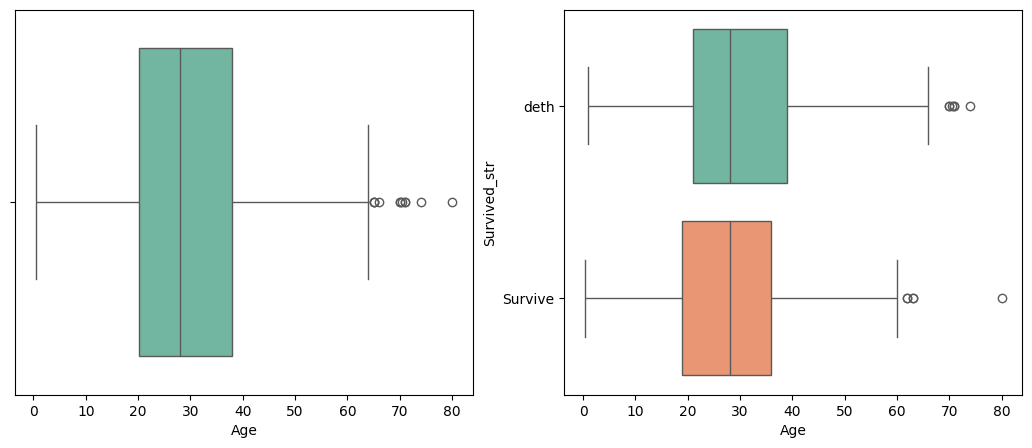

<ipython-input-32-bcedddecf367>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=raw_data_train[col_name], ax=ax[0], palette='Set2')
<ipython-input-32-bcedddecf367>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=raw_data_train, x=col_name, y="Survived_str", ax=ax[1], palette='Set2')


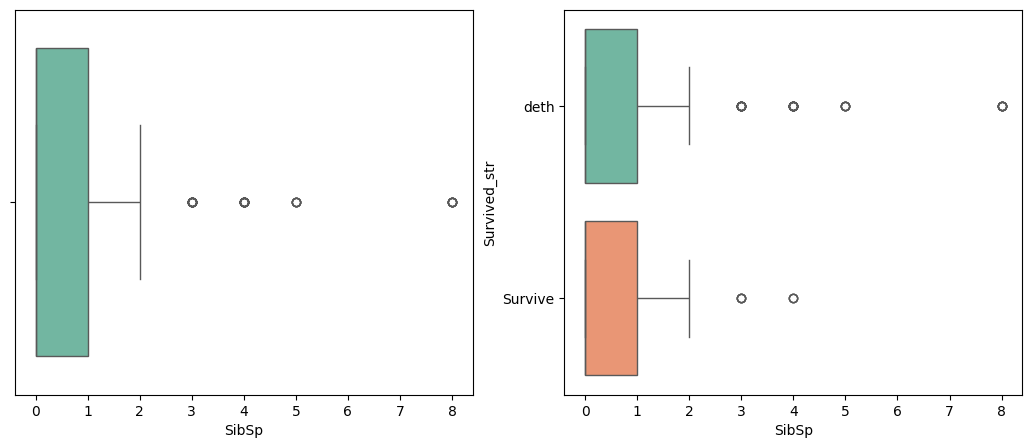

<ipython-input-32-bcedddecf367>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=raw_data_train[col_name], ax=ax[0], palette='Set2')
<ipython-input-32-bcedddecf367>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=raw_data_train, x=col_name, y="Survived_str", ax=ax[1], palette='Set2')


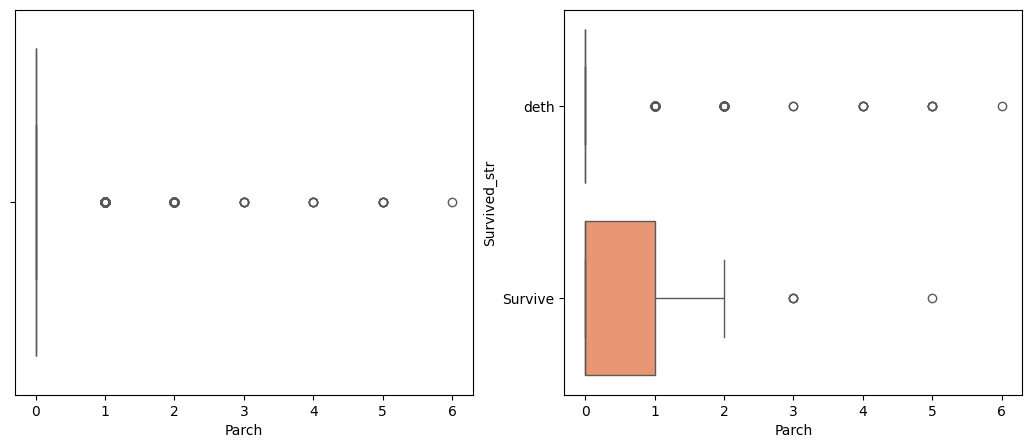

<ipython-input-32-bcedddecf367>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=raw_data_train[col_name], ax=ax[0], palette='Set2')
<ipython-input-32-bcedddecf367>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=raw_data_train, x=col_name, y="Survived_str", ax=ax[1], palette='Set2')


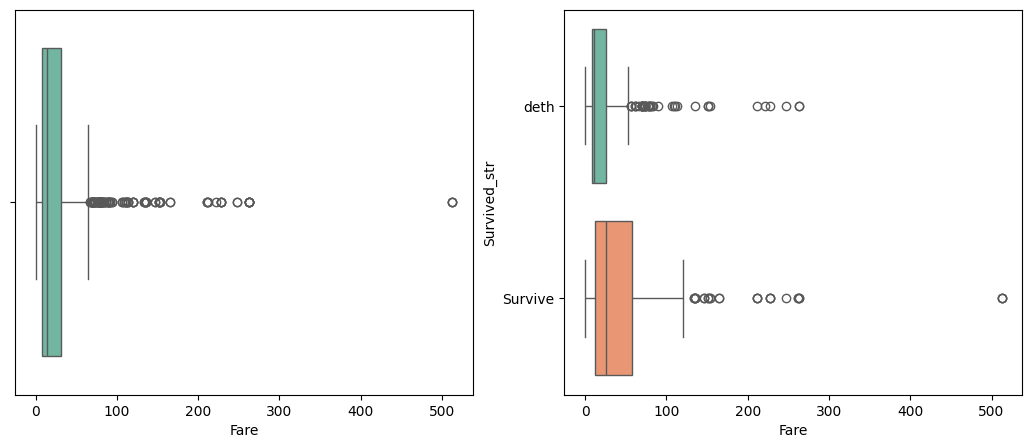

In [32]:
raw_data_train['Survived_str'] = raw_data_train['Survived'].apply(lambda x: 'deth' if x == 0 else 'Survive')

columns = ['Age', 'SibSp', 'Parch', 'Fare']

for col_name in columns:

    fig, ax = plt.subplots(ncols=2, figsize=(13,5))

    sns.boxplot(x=raw_data_train[col_name], ax=ax[0], palette='Set2')

    sns.boxplot(data=raw_data_train, x=col_name, y="Survived_str", ax=ax[1], palette='Set2')

    plt.show()

In [33]:
train = raw_data_train.copy()

test = raw_data_test.copy()

submission = raw_data_submission.copy()

mean_age = train['Age'].mean()

mean_fare = train['Fare'].mean()

# ‘Age’ ‘Fare’ feature의 Null 값을 각 feature의 평균(mean)값으로 대체

train['Age'] = train['Age'].fillna(mean_age)

test['Age'] = test['Age'].fillna(mean_age)

train['Fare'] = train['Fare'].fillna(mean_fare)

test['Fare'] = test['Fare'].fillna(mean_fare)

In [34]:
train = train[train['Parch'] <= 5]

train = train[train['Fare'] <= 300]

In [35]:
train_x = train.drop(columns='Survived')
train_y = train['Survived']

from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y  = train_test_split(train_x, train_y, test_size=0.2, random_state=0)

import statsmodels.api as sm

train_dataset = train_x.copy()
train_dataset['Survived'] = train_y

formula = """
Survived ~ C(Pclass)+ C(Sex) + scale(Age) + scale(SibSp) + scale(Parch) + scale(Fare) + C(Embarked)
"""
model = sm.Logit.from_formula(formula, data=train_dataset)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.409069
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  707
Model:                          Logit   Df Residuals:                      697
Method:                           MLE   Df Model:                            9
Date:                Thu, 28 Mar 2024   Pseudo R-squ.:                  0.3795
Time:                        22:42:54   Log-Likelihood:                -289.21
converged:                       True   LL-Null:                       -466.10
Covariance Type:            nonrobust   LLR p-value:                 9.740e-71
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.1112      0.392      7.944      0.000       2.344       3.879
C(Pclass)[T

In [36]:
y_pred = result.predict(val_x)

y_pred = y_pred.apply(lambda x: 1 if x >= 0.5 else 0)

from sklearn.metrics import confusion_matrix

print(confusion_matrix(val_y, y_pred))

from sklearn.metrics import classification_report

print(classification_report(val_y, y_pred))

[[84 19]
 [32 43]]
              precision    recall  f1-score   support

           0       0.72      0.82      0.77       103
           1       0.69      0.57      0.63        75

    accuracy                           0.71       178
   macro avg       0.71      0.69      0.70       178
weighted avg       0.71      0.71      0.71       178



In [37]:
y_pred = result.predict(test)

y_pred = y_pred.apply(lambda x: 1 if x>=0.5 else 0)

submission['Survived'] = y_pred

submission.head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [38]:
submission.to_csv('submission.csv', index=False)

In [39]:
#5. EDA & 모델링(2)
import pandas as pd
raw_data_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
raw_data_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
raw_data_submission=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/submission.csv')

In [40]:
train = raw_data_train.copy()
test = raw_data_test.copy()
submission = raw_data_submission.copy()

columns=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train = train[columns + ['Survived']]
test = test[columns]

In [41]:
mean_age = train['Age'].mean()
mean_fare = train['Fare'].mean()

train.loc[:, 'Age'] = train['Age'].fillna(mean_age)
test.loc[:, 'Age'] = test['Age'].fillna(mean_age)
train.loc[:, 'Fare'] = train['Fare'].fillna(mean_fare)
test.loc[:, 'Fare'] = test['Fare'].fillna(mean_fare)

train = train[train['Parch'] <= 5]
train = train[train['Fare'] <= 300]


<ipython-input-41-2396ca2c3df1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'Age'] = test['Age'].fillna(mean_age)
<ipython-input-41-2396ca2c3df1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.loc[:, 'Fare'] = test['Fare'].fillna(mean_fare)


In [42]:
train['Sex'] = train['Sex'].apply(lambda x: 0 if x == 'female' else 1)
test['Sex'] = test['Sex'].apply(lambda x: 0 if x == 'female' else 1)

train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)

<ipython-input-42-f8f78b2bdbf1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Sex'] = test['Sex'].apply(lambda x: 0 if x == 'female' else 1)


In [43]:
train_x = train.drop(columns=['Survived'])
train_y = train['Survived']
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y  = train_test_split(train_x, train_y, test_size=0.2, random_state=0)

In [44]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(train_x,list(train_y))
X_resampled['Survived'] = y_resampled
train_dataset = X_resampled

In [45]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=6, random_state=0)
model.fit(train_dataset.drop(columns='Survived'),train_dataset['Survived'])

DecisionTreeClassifier(max_depth=6, random_state=0)

In [46]:
y_pred = model.predict(val_x)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(val_y, y_pred))
from sklearn.metrics import classification_report
print(classification_report(val_y, y_pred))

[[89 14]
 [29 46]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.81       103
           1       0.77      0.61      0.68        75

    accuracy                           0.76       178
   macro avg       0.76      0.74      0.74       178
weighted avg       0.76      0.76      0.75       178



In [47]:
y_pred = model.predict(test)
submission['Survived']=y_pred
submission['Survived']=submission['Survived'].apply(lambda x:1 if x>=0.5 else 0)
submission.head(15)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [48]:
submission.to_csv('submission.csv', index=False)

In [49]:
#6.모델링
import pandas as pd
train=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/train.csv')
test=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/test.csv')
submission=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/submission.csv')

In [50]:
columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
train = train[columns+['Survived']]


test = test[columns]#2

mean_age=train['Age'].mean()
mean_fare=train['Fare'].mean()#3

train['Age']=train['Age'].fillna(mean_age)
test['Age']=test['Age'].fillna(mean_age)
train['Fare']=train['Fare'].fillna(mean_fare)
test['Fare']=test['Fare'].fillna(mean_fare)#4

train = train[train['Parch'] <= 5]
train = train[train['Fare'] <= 300]#5

train['Sex']=train['Sex'].apply(lambda x:0 if x=='female' else 1)
test['Sex']=test['Sex'].apply(lambda x:0 if x=='female' else 1)#6

train = pd.get_dummies(train, columns=['Embarked'], drop_first=True)
test = pd.get_dummies(test, columns=['Embarked'], drop_first=True)#7

train_x = train.drop(columns=['Survived'])
train_y = train['Survived']


from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y= train_test_split(train_x, train_y, test_size=0.2, random_state=0)

from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=0)

X_resampled, y_resampled = smote.fit_resample(train_x,list(train_y))

X_resampled['Survived']=y_resampled

train_dataset = X_resampled

In [51]:
import statsmodels.api as sm #로지스틱 회귀

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
formula="""
Survived ~ C(Pclass) + C(Sex) + scale(Age) + scale(SibSp) + scale(Parch) + scale(Fare) + C(Embarked_Q)+ C(Embarked_S)
"""

model = sm.Logit.from_formula(formula, data=train)
result = model.fit()
y_pred = result.predict(val_x)
y_pred=y_pred.apply(lambda x: 1 if x>=0.5 else 0)

print(confusion_matrix(val_y, y_pred))
print(classification_report(val_y,y_pred))

Optimization terminated successfully.
         Current function value: 0.440644
         Iterations 6
[[83 20]
 [31 44]]
              precision    recall  f1-score   support

           0       0.73      0.81      0.76       103
           1       0.69      0.59      0.63        75

    accuracy                           0.71       178
   macro avg       0.71      0.70      0.70       178
weighted avg       0.71      0.71      0.71       178



In [52]:
from sklearn.tree import DecisionTreeClassifier #의사결정나무 모델
model = DecisionTreeClassifier(max_depth=6, random_state=0)
model.fit(train_dataset.drop(columns='Survived'),train_dataset['Survived'])
y_pred = model.predict(val_x)
print(confusion_matrix(val_y, y_pred))
print(classification_report(val_y,y_pred))

[[89 14]
 [29 46]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.81       103
           1       0.77      0.61      0.68        75

    accuracy                           0.76       178
   macro avg       0.76      0.74      0.74       178
weighted avg       0.76      0.76      0.75       178



In [53]:
from sklearn.ensemble import RandomForestClassifier #랜덤포레스트
model = RandomForestClassifier(n_estimators=200,max_depth=5, random_state=0)
model.fit(train.drop(columns='Survived'),train['Survived'])
y_pred = model.predict(val_x)
print(confusion_matrix(val_y, y_pred))
print(classification_report(val_y,y_pred))

[[96  7]
 [33 42]]
              precision    recall  f1-score   support

           0       0.74      0.93      0.83       103
           1       0.86      0.56      0.68        75

    accuracy                           0.78       178
   macro avg       0.80      0.75      0.75       178
weighted avg       0.79      0.78      0.76       178



In [54]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=200, learning_rate=0.01, max_depth=5, random_state=0)
model.fit(train.drop(columns='Survived'),train['Survived'])
y_pred=model.predict(val_x)
print(confusion_matrix(val_y,y_pred))
print(classification_report(val_y,y_pred))

[[94  9]
 [26 49]]
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       103
           1       0.84      0.65      0.74        75

    accuracy                           0.80       178
   macro avg       0.81      0.78      0.79       178
weighted avg       0.81      0.80      0.80       178



In [56]:
my_model = XGBClassifier(n_estimators=200, learning_rate=0.01, max_depth=5, random_state=0)
my_model.fit(train_dataset.drop(columns='Survived'),train_dataset['Survived'])
XGB_pred = my_model.predict(test)

In [57]:
y_pred = my_model.predict(test)
submission['Survived'] = y_pred
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [58]:
submission.to_csv('submission.csv',index=False)